In [16]:
import numpy as np
import os 
import matplotlib.pyplot as plt

In [35]:
def load_partial(folder, height, batchsize, overlap):
    lowerh = 0
    upperh = batchsize
    partial = []
    while(height-upperh > batchsize):
        p = np.load(os.path.join(folder, str(lowerh)+'to'+str(upperh)) + '.npy')
        partial.append(p)
        lowerh = upperh - overlap
        upperh = lowerh + batchsize
    p = np.load(os.path.join(folder, str(lowerh)+'to'+str(height)) + '.npy')
    partial.append(p)
    return partial

def stitch(partial, height, batchsize, overlap):
    lowerh = 0
    upperh = batchsize
    full = np.full((height, partial[0].shape[1]), -1)
    hoverlap = overlap/2
    i = 0
    while(height-upperh > batchsize):
        # print(lowerh, upperh)
        if(lowerh==0):
            full[int(lowerh):int(upperh-hoverlap)] = partial[i][0:int(batchsize-hoverlap)]
        else:
            full[int(lowerh+hoverlap):int(upperh-hoverlap)] = partial[i][int(hoverlap):int(batchsize-hoverlap)]
        lowerh = upperh - overlap
        upperh = lowerh + batchsize
        i+=1
    full[int(lowerh+hoverlap):] = partial[i][int(hoverlap):]
    return full

In [34]:
partial = load_partial("run\\recycle", 275, 40, 10)

In [36]:
full = stitch(partial, 275, 40,10)

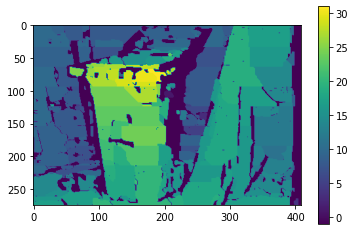

In [37]:
plt.imshow(full)
plt.colorbar()

In [38]:
partial2 = load_partial("run\\recycle2", 275, 50, 8)

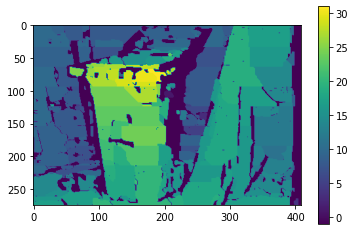

In [39]:
full2 = stitch(partial, 275, 40,10)
plt.imshow(full2)
plt.colorbar()